# Counting the incidence of the word "I" in English corpora vs. that of the word "私" and variants in Japanese corpora

## First we need to obtain the relevant data
### We will define a generic function that opens the relevant files and prepares them for analysis.

In [4]:
def prepare(path):
    with open(path, encoding="utf-8") as f:
        out = f.readlines()
    for l in out:
        l.rstrip("\n")

    return out


### Then we can define generic counting functions for each language:

In [2]:
# This function counts the occurrence of the word "I" in a sentence in English
def i_count_en(sentence):
    count = 0
    for i, c in enumerate(sentence):
        # Checking whether the character could be the right one
        if c in ("i", "I"):
            # Checking whether the character is the first or last in the sentence. The first clause checks if the 
            # current character is the first, and if so, it only adds to count if the next character is not an
            # alphabetic character. The second one checks if the character is the last, and if so, it only adds to
            # count if the previous character is not an alphabetic character. The last one checks if the character is
            # neither the first or last character of a sentence, and if so, it only adds to count if neither of the
            # surrounding characters are alphabetic.
            if (i == 0 and not sentence[i+1].isalpha()) or \
                    (i == len(sentence) - 1 and not sentence[i-1].isalpha()) or \
                    (i not in (0, len(sentence) - 1) and not (sentence[i-1].isalpha() or sentence[i+1].isalpha())):
                count += 1

    return count


# This function counts the occurrence of the word "私" and variants in a sentence in Japanese
def i_count_ja(sentence):
    count = 0
    # This does not account for compounds so maybe it should be adapted
    for w in ["私", "僕", "俺", "我", "吾", "儂", "わたし", "わたくし", "われ", "わが", "おれ", "ぼく", "わし", "あたし", "あたくし"]:
        count += sentence.count(w)

    return count


### From JESC:

In [5]:
jesc_en = prepare("corpora/jesc/raw/en")
jesc_ja = prepare("corpora/jesc/raw/ja")

jesc_i_count_en = 0
jesc_i_count_ja = 0

for s in jesc_en:
    jesc_i_count_en += i_count_en(s)

for s in jesc_ja:
    jesc_i_count_ja += i_count_ja(s)

print("JESC English count:", jesc_i_count_en)
print("JESC Japanese count:", jesc_i_count_ja)


JESC English count: 756475
JESC Japanese count: 330176


### From OpenSubs:

In [6]:
os_en = prepare("corpora/opensubs/txt/raw/en")
os_ja = prepare("corpora/opensubs/txt/raw/ja")

os_i_count_en = 0
os_i_count_ja = 0

for s in os_en:
    os_i_count_en += i_count_en(s)

for s in os_ja:
    os_i_count_ja += i_count_ja(s)

print("OpenSubs English count:", os_i_count_en)
print("OpenSubs Japanese count:", os_i_count_ja)


OpenSubs English count: 528277
OpenSubs Japanese count: 209823


## Graphs
### From JESC:

C:\Users\pedro\Google Drive\phmw500\Tokyo Tech\Research\Repos\shizen\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


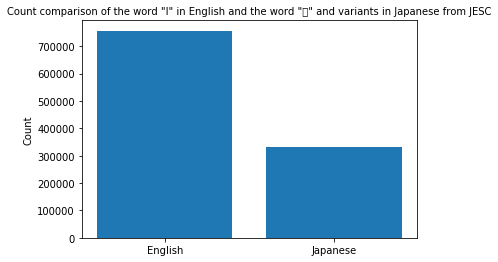

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

# TODO: fix font issues
font = FontProperties("Meiryo")
# TODO: customise graph further 

jesc_bar_objects = ["English", "Japanese"]
jesc_y_pos = np.arange(len(jesc_bar_objects))
jesc_bar_h = (jesc_i_count_en, jesc_i_count_ja)

jesc_bar = plt.bar(jesc_y_pos, jesc_bar_h, align="center")
plt.xticks(jesc_y_pos, jesc_bar_objects, fontproperties=font)
plt.ylabel("Count", fontproperties=font)
plt.title("Count comparison of the word \"I\" in English and the word \"私\" and variants in Japanese from JESC",
          fontproperties=font)

plt.show()

### From OpenSubs:

C:\Users\pedro\Google Drive\phmw500\Tokyo Tech\Research\Repos\shizen\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


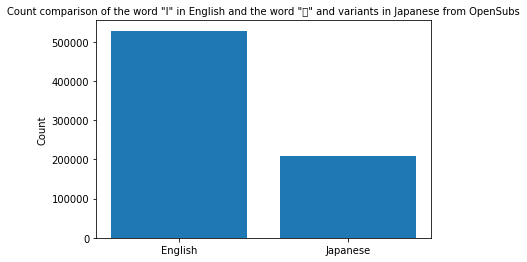

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

# TODO: fix font issues
font = FontProperties("Meiryo")
# TODO: customise graph further 

os_bar_objects = ["English", "Japanese"]
os_y_pos = np.arange(len(os_bar_objects))
os_bar_h = (os_i_count_en, os_i_count_ja)

os_bar = plt.bar(os_y_pos, os_bar_h, align="center")
plt.xticks(os_y_pos, os_bar_objects, fontproperties=font)
plt.ylabel("Count", fontproperties=font)
plt.title("Count comparison of the word \"I\" in English and the word \"私\" and variants in Japanese from OpenSubs",
          fontproperties=font)

plt.show()

### Joining both:

C:\Users\pedro\Google Drive\phmw500\Tokyo Tech\Research\Repos\shizen\venv\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['Meiryo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


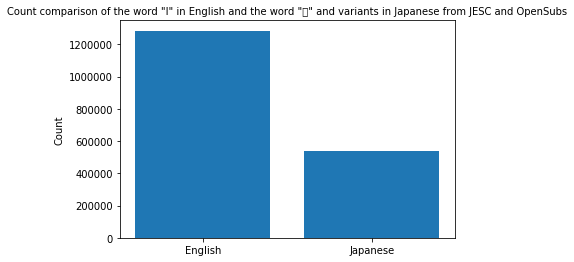

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

# TODO: fix font issues
font = FontProperties("Meiryo")
# TODO: customise graph further 

joint_bar_objects = ["English", "Japanese"]
joint_y_pos = np.arange(len(joint_bar_objects))
joint_bar_h = (jesc_i_count_en+os_i_count_en, jesc_i_count_ja+os_i_count_ja)

joint_bar = plt.bar(joint_y_pos, joint_bar_h, align="center")
plt.xticks(joint_y_pos, joint_bar_objects, fontproperties=font)
plt.ylabel("Count", fontproperties=font)
plt.title("Count comparison of the word \"I\" in English and the word \"私\" and variants in Japanese from JESC and "
          "OpenSubs", 
          fontproperties=font)

plt.show()
